### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2020 ###

#  Saving the World: Global Pandemic Edition #

#### Rashelle Pershman (rpershman@wisc.edu), Jack Cassady (jacassady@wisc.edu), and Mackenzie Dahlquist (mjdahlquist@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Minimum Cost Objective](#2.A.-Minimum-Cost-Objective)
        1. [Variables](#2.A.i.-Variable-Definitions)
        1. [Expressions](#2.A.ii.-Expressions-Used)
        1. [Other Variables](#2.A.iii.-Other-Variables-Used)
        1. [Model](#2.A.iv.-Minimum-Cost-Model)
    1. [Max Flow Objective](#2.B.-Max-Flow-Objective)
        1. [Variables](#2.B.i.-Variable-Definitions)
        1. [Others](#2.B.ii.-Other-Definitions)
        1. [Model](#2.B.iii.-Maximum-Flow-Model)
1. [Solution](#3.-Solution)
    1. [Set Up](#3.A.-Set-Up)
    1. [Inventories](#3.A.i.-Beginning-Inventories)
    1. [Patient Data](#3.A.ii.-Setting-Up-Patient-Data)
    1. [Code](#3.B.-Solving)
1. [Results and Discussion](#4.-Results-and-discussion)
    1. [Max Flow](#4.A.-Max-Flow-Results)
    1. [Min Cost](#4.B.-Min-Cost-Results)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

As of March 2020, the World Health Organization declared a mysterious Wuhan epidemic to be an international pandemic. Borders have closed, travel is limited, and most of the public in America has been given a “stay-at-home” order at least once. Many citizens feel that life as they know it is forever changed. The virus, known as Coronavirus or Covid-19, can cause fever, coughing, sore throat, shortness of breath, severe fatigue, and a plethora of other symptoms. Those at highest risk tend to be immunocompromised, such as individuals with diabetes, asthma, liver disease, and more.  

During this pandemic, hospitals have been overflowing with Coronavirus patients, and many are running out of supplies and/or room. Unrelated surgeries and appointments are being postponed, and hospital staff are feeling overwhelmed, sometimes to the point of mental breakdown.  

Because this virus is so new, there aren’t any prepared regulations and processes to optimize treating these patients. To alleviate the stress and chaos of current events within hospitals, as well as give higher-level treatment and minimize casualties, our team has developed a surface-level program to determine the supplies and staff necessary for the average amount of patients in hospitals in the south central region of Wisconsin, depending on the severity of the patients’ health.  

The problem data is pseudo randomly generated by code based on the total supplies and staff in hospitals in the south central region of Wisconsin (Wisconsin Department of Health Services). More severe virus patients will require more care and resources than those with mild symptoms. Logically, treating severe patients first would serve this goal. A multiperiod planning linear program with an objective of minimizing cost is used to display the constants, variables, etc. necessary for the overall problem, along with the levels of severity a patient can have, which has been simplified to four levels: no Coronavirus symptoms/symptoms not requiring hospitalization, mild symptoms that require fluids and monitoring the patient in the hospital, moderate symptoms that require more attention and a ventilator, and severe symptoms that require a ventilator and has additional life-threatening complications. Afterwards, a max flow linear program is used to see the capacity of each treatment path possible. The overall model takes into account the following assumptions:

* CDC data on hospitalization applies to the south central region of Wisconsin.
* The probability that a Covid patient requires mechanical ventilation in all of Wisconsin is the same for the south central region of Wisconsin.
* There are no deaths.
* No patient discharges from the hospital besides severity 1 patients.
* No patient changes severity during the observed week.

Our network flow for our patient treatment can be seen in the image below:

![Network Flow](network_flow.png "Logo Title Text 1")

## 2. Mathematical model ##

Building our math model, we wanted to be able to find the maximum number of Covid-19 patients that our hospital could treat. As well as minimizing the cost to treat these patients. As a result we have two math models that can be represented as such:

## 2.A. Minimum Cost Objective ##

**Type of Model:** Multiperiod Planning Linear Program

### 2.A.i. Variable Definitions ###

Variable | Definition
--- | ---
$Gown_t$ | Number of patient gowns in inventory on day t  
$Gown\_Order_t$ | Number of patient gowns ordered on day t  
$Staff\_Gown_t$ |  Number of staff gowns in inventory on day t  
$Staff\_Gown\_Order_t$ | Number of staff gowns ordered on day t  
$Glove_t$ | Number of gloves in inventory on day t  
$Glove\_Order_t$ | Number of gloves ordered on day t  
$N95\_Mask_t$ | Number of N95 masks in inventory on day t  
$N95\_Mask\_Order_t$ | Number of N95 masks ordered on day t  
$Surg\_Mask_t$ | Number of surgical masks in inventory on day t  
$Surg\_Mask\_Order_t$ | Number of surgical masks ordered on day t  
$Shield_t$ | Number of face shields in inventory on day t  
$Shield\_Order_t$ | Number of face shields ordered on day t  
$Vent_t$ | Number of ventilators in inventory on day t  
$Vent\_Order_t$ | Number of ventilators ordered on day t  
$Fluid_t$ | Milliliters of fluid in inventory on day t  
$Fluid\_Order_t$ | Milliliters of fluid ordered on day t  
$N_t$ | Number of Nurses working on day t  
$D_t$ | Number of Doctors working on day t  
$N\_On_t$ | Number of Nurses called in on day t  
$D\_On_t$ | Number of Doctors called in on day t  
$N\_Off_t$ | Number of Nurses called off on day t  
$D\_Off_t$ | Number of Doctors called off on day t  

### 2.A.ii. Expressions Used ###

Expression | Definition
--- | ---
$Staff_t$ | Total staff on day t
$Tot\_Pat_t$ | Total number of patients seen on day t
$Adm\_Pat_t$ | Number of admitted patients seen on day t
$Gown\_Use_t$ | Number of patient gowns used on day t
$Staff\_Gown\_Use_t$ | Number of staff gowns used on day t
$Glove\_Use_t$ | Number of pairs of gloves used on day t
$N95\_Mask\_Use_t$ | Number of N95 masks used on day t
$Surg\_Mask\_Use_t$ | Number of surgical masks used on day t
$Shield\_Use_t$ | Number of face shields used on day t
$Fluid\_Use_t$ | Milliliters of fluid used on day t
$Vent\_Use_t$ | Number of ventilators used on day t

### 2.A.iii. Other Variables Used ###

Variable | Definition
--- | ---
$Pat\_4_t$ | Number of Severity 4 patients
$Pat\_3_t$ | Number of Severity 3 patients
$Pat\_2_t$ | Number of Severity 2 patients
$Pat\_1_t$ | Number of Severity 1 patients


### 2.A.iv. Minimum Cost Model ###
$$\begin{aligned} \underset{ \mathbb{}}{\text{minimize}}\qquad& \sum_{t \in days} 393.69*D_t \space + 180.47*N_t + 6.00*N95\_Mask\_Use_t + 0.50*Surg\_Mask\_Use_t + 25,000.00*Vent\_Use_t \\ & + 0.25*Glove\_Use_t + 4.15*Gown\_Use_t + 5.00*Shield\_Use_t + 5.00*Fluid\_Use_t + 2.00*Staff\_Gown\_Use_t\\ \text{subject to:}\qquad& Pat\_4_t \le 14D_t, \forall \space t \in days\\ & Pat\_3_t \le 14D_t, \forall \space t \in days\\ & Pat\_2_t \le 20D_t, \forall \space t \in days\\ & Pat\_4_t \le 2N_t, \forall \space t \in days\\ & Pat\_3_t \le 2N_t, \forall \space t \in days\\ & Pat\_2_t \le 4N_t, \forall \space t \in days\\ & Pat\_1_t \le 4N_t, \forall \space t \in days\\ & D_t = D_{t-1} + On\_D_t - Off\_D_t, \forall \space t \in days\\ & N_t = N_{t-1} + On\_N_t - Off\_N_t, \forall \space t \in days\\ \\ & Staff_t = D_t + N_t, \forall \space t \in days\\ & Tot\_Pat_t = Pat\_4_t + Pat\_3_t + Pat\_2_t + Pat\_1_t, \forall \space t \in days\\ & Adm\_Pat_t = Pat\_4_t + Pat\_3_t + Pat\_2_t, \forall \space t \in days\\ \\ & Adm\_Pat_t \le 102, \forall \space t \in days\\ & Gown\_Use_t = 20*Adm\_Pat_t, \forall \space t \in days\\ & Staff\_Gown\_Use_t = 20*Tot\_Pat_t, \forall \space t \in days\\ & Glove\_Use_t = 250*Tot\_Pat_t, \forall \space t \in days\\ & N95\_Mask\_Use_t = 6*Tot\_Pat_t, \forall \space t \in days\\ & Surg\_Mask\_Use_t = 10*Tot\_Pat_t, \forall \space t \in days\\ & Shield\_Use_t = Staff_t, \forall \space t \in days\\ & Fluid\_Use_t = 2,179*Adm\_Pat_t, \forall \space t \in days\\ & Vent\_Use_t = Pat\_4_t + Pat\_3_t, \forall \space t \in days\\ \\ & Gown_{t-1} + Gown\_Order_t = Gown\_Use_t + Gown_t, \forall \space t \in days\\ & Staff\_Gown_{t-1} + Staff\_Gown\_Order_t = Staff\_Gown\_Use_t + Staff\_Gown_t, \forall \space t \in days\\ & Glove_{t-1} + Glove\_Order_t = Glove\_Use_t + Glove_t, \forall \space t \in days\\ & N95\_Mask_{t-1} + N95\_Mask\_Order_t = N95\_Mask\_Use_t + N95\_Mask_t, \forall \space t \in days\\ & Surg\_Mask_{t-1} + Surg\_Mask\_Order_t = Surg\_Mask\_Use_t + Surg\_Mask_t, \forall \space t \in days\\ & Shield_{t-1} + Shield\_Order_t = Shield\_Use_t + Shield_t, \forall \space t \in days\\ & Fluid_{t-1} + Fluid\_Order_t = Fluid\_Use_t + Fluid_t, \forall \space t \in days\\ & Vent_{t-1} + Vent\_Order_t = Vent\_Use_t + Vent_t, \forall \space t \in days\\ \\& Gown_0 = 3,120\\ & Staff\_Gown_0 = 3,120\\ & Glove_0 = 39,000\\ & N95\_Mask_0 = 936\\ & Surg\_Mask_0 = 1560\\ & Shield_0 = 69\\ & Fluid_0 = 339,924\\ & Vent_0 = 16\\ & D_0 = 80\\ & N_0 = 160\\ \\ & Gown_t, Gown\_Order_t, Staff\_Gown_t, Staff\_Gown\_Order_t, Glove_t, Glove\_Order_t, N95\_Mask_t, N95\_Mask\_Order_t, \\ & Surg\_Mask_t, Surg\_Mask\_Order_t, Shield_t, Shield\_Order_t, Vent_t, Vent\_Order_t, Fluid_t, Fluid\_Order_t, N_t, D_t, N\_On_t, \\ & D\_On_t, N\_Off_t, D\_Off_t \ge 0, \forall \space t \in days\\ \end{aligned}$$


## 2.B. Max Flow Objective ##

**Type of Model**: Max Flow Linear Program

### 2.B.i. Variable Definitions ###

* $x_{ij}$: The total flow of patients through our treatment network

### 2.B.ii. Other Definitions ###

Data | Definition
--- | ---
Nodes | Our set of treatment nodes
Paths | Set of treatment paths that patients can take
$cap_{ij}$ | Capacity of each path
$c_{ij}$ | Cost of each node

### 2.B.iii. Maximum Flow Model ###
$$\begin{aligned} \underset{ \mathbb{}}{\text{minimize}}\qquad& -\sum_{i \in Paths}\sum_{j \in Paths} c_{ij} * x_{ij}\\ \text{subject to:}\qquad& \sum_{j \in Nodes}x_{kj} = \sum_{i \in Nodes}x_{ik} && \forall \space k \in Nodes\\ & x_{ij} \le cap_{ij} && \forall \space (i,j) \in Paths\\ & x_{ij} \ge 0 && \forall \space (i,j) \in Paths\\ \end{aligned}$$

## 3. Solution ##

### 3.A. Set Up ###
### 3.A.i. Beginning Inventories ###

Using the data from the Johns Hopkins Center for Health(11), we find the following numbers for the use of consumables:

PPE | Requirement (Per Person Per Day)
--- | ---------
Gloves | 250
Gowns | 20
Staff Gowns | 20
N95 Mask | 6
Surgical Mask | 10

Then using our current number of Covid-19 patients admitted at our hospital plus our average daily increase in cases we can use this number to find an approximation of the amount of each consumable needed each day:  

PPE | Need (Per Day)
--- | ---------
Gloves | 13,000 
Gowns | 1,040 
Staff Gowns | 1,040
N95 Mask | 312 
Surgical Mask | 520 

Next using our assumption that we have 3 days of inventory we find our beginning inventory levels for Gloves, Gowns, Staff Gowns, N95 Masks, and Surgical Masks:  

PPE | Inventory at Day 0
--- | ---------
Gloves | 39,000 
Gowns | 3120 
Staff Gowns | 3120 
N95 Mask| 936 
Surgical Mask | 1560

Determining the number of Face Shields required each day we need to use the requirement of doctors and nurses for each severity level of patient since we know that only 1 Face Shield is needed for each staff member per day. Using the data we found on the number of doctors and nurses required for each level of patient(12)(13)(14) we find:  
* Severity 4 => 1/2 Nurses and 1/14 Doctors
* Severity 3 => 1/2 Nurses and 1/14 Doctors
* Severity 2 => 1/4 Nurses and 1/20 Doctors
* Severity 1 => 1/4 Nurses

So using approximate numbers for the number of each type patient we have:
* Severity 4 => 11 cases = 7 Shields
* Severity 3 => 11 cases = 7 Shields
* Severity 2 => 23 cases = 7 Shields
* Severity 1 => 8 cases = 2 Shields

Thus, we need roughly 23 Face Shields per day and a starting inventory level of 69 Face Shields.  

Finding the number of Fluids needed each day we use the data from the International Fluid Academy(15), that shows that we need approximately 27 mL/kg/day. To find the amount required per patient per day we will use the assumption that every patient is the average weight of an adult in North America of 80.7 kg(16) giving us the requirement of 2,179 mL/patient/day. Subsequently, we use our number of current admitted patients plus the average number of positive cases per day to find our daily need of 113,308 mL and as a result our starting inventory of 339,924 mL.

Finally we calculate the number of ventilators and beds on hand by finding the total number of hospitals in the South Central region of Wisconsin which is 23(10). Then using the number of ventilators in the region of 366(17) we find that we have approximately 16 ventilators per hospital. Furthermore, we know that the number of beds available in the region is 2346 and using the same process we find that we have 102 beds. Our number of beds will be used as a constant in our model for the number of patients we can treat so it will not be included in our inventory. 

This gives us our overall per patient per day requirements of each consumable of:

PPE | Requirement (Per Person Per Day)
--- | ---------
Gloves | 250
Gowns | 20
Staff Gowns | 20
N95 Mask | 6
Surgical Mask | 10
Face Shield | 1 (Per Medical Staff)
Fluids | 2,179 mL
Ventilators | 1

And provides our beginning inventory of:

PPE | Inventory at Day 0
--- | ---------
Gloves | 39,000 
Gowns | 3120 
Staff Gowns | 3120 
N95 Mask| 936 
Surgical Mask | 1560
Face Shield | 69
Fluids | 339,924 mL
Ventilators | 16


### 3.A.ii. Setting Up Patient Data ###

Our project looks at 7 days of treating covid patients, using the most recent data on positive covid cases in Dane county we find the following information(18):  

Date | Number of Positive Cases
---- | ------------------------
Jul 27 | 8
Jul 28 | 7
Jul 29 | 14
Jul 30 | 8
Jul 31 | 16
Aug 1 | 6
Aug 2 | 18

Breaking these numbers down we have that:  
* Average: 11
* Standard Deviation: 4.504

We used the average $\pm$ 1σ in order to find the upper and lower bounds for our new case generator, rounding the lower bound down to the nearest integer and rounding the upper bound up to the nearest integer giving us the bounds of $ 6 \le x \le 16 $ with x being the number of new cases each day.

Then to break down the number of patients into their severities, we began by multiplying the number of daily cases by the percentage of Covid cases that require hospitalization. According the the CDC, the rate of hospitalization for Covid-19 is 130.1 per 100,000 population(19). Using the population of Dane County which is 529,843 we can estimate that roughly 689.33 people required hospitalization in Dane County and then dividing this by the number total number of cases in Dane county, 4,198(2). We find that our percentage of positive tests that require hospitalization is 16.42%.

We can use this percentage to find the number of our generated daily cases that require hospitalization. The patients that do not require hospitalization are classified as severity 1 and can be found by finding the difference between the number of cases and the number hospitalized. 

Next to break our Admitted Patients into severities 2, 3, and 4 we first use the information that there are 7 patients currently in Intensive Care with Covid-19 which we will classify as Severity 4 in our case. With 41 patients currently receiving care for Covid in our hospital this means that 17.07% of our admitted patients are severity 4. Since severities 2, 3, and 4 cannot occur at the same time this means that they are mutually exclusive and collectively exhaustive and thus must make up 100% of of our Admitted Patients this means that 82.93% must be severity 2 or 3. 

In order to find the probabilities that an admitted patient has severity 2 or 3 we must use the information that only severities 3 and 4 require mechanical ventilation. To find the probability that a patient of Covid-19 requires mechanical ventilation we will use data for the state of Wisconsin and assume that this probability is the same in Dane county, there have been 4,732 people to ever be hospitalized due to covid, and with 18% of those being active cases we can say that there are roughly 852 people hospitalized in Wisconsin. With 321 patients currently using mechanical ventilation in Wisconsin(17) the probability that a Covid patient requires mechanical ventilation and thus, the probability of severity 3 and 4 is 37.68%. Since the probabilities of severities 3 and 4 must add up to 37.68% and the probability of a patient being severity 4 is 17.07% then the probability that a patient is severity 3 must be 20.61%. Once again since the total probability of admitted patients is the sum of the probabilities of severities 2, 3, and 4 then the probability that a patient is severity 2 is 62.32%. Thus our probabilities are as follows:

x | P(x)
---|----
2 | 0.6232
3 | 0.2061
4 | 0.1707

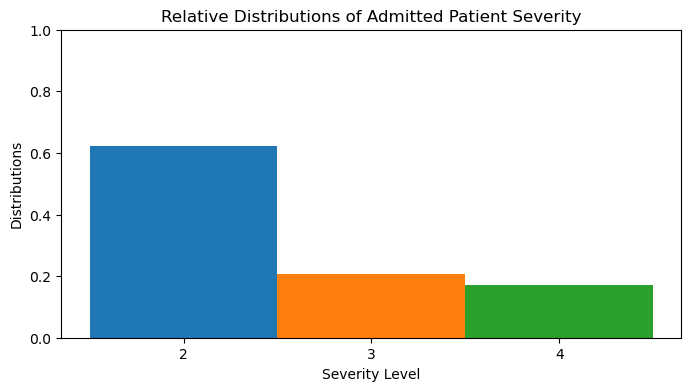

In [1]:
using PyPlot
figure(figsize=(8,4))
xticks([2, 3, 4])
ylim(0, 1)
xlabel("Severity Level")
ylabel("Distributions")
title("Relative Distributions of Admitted Patient Severity")
bar(2, 0.6232, width=1)
bar(3, 0.2061, width=1)
bar(4, 0.1707, width=1);

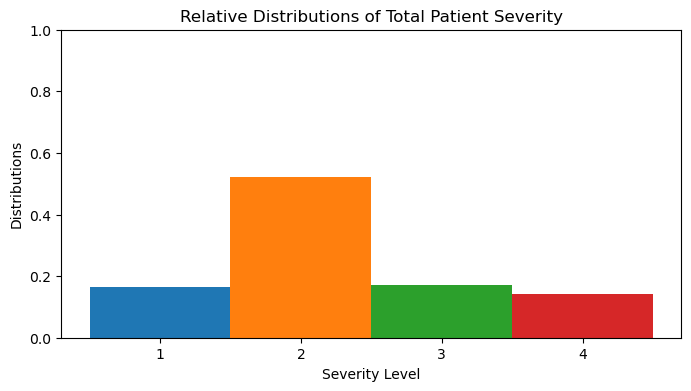

In [39]:
using PyPlot
figure(figsize=(8,4))
xticks([1, 2, 3, 4])
ylim(0, 1)
xlabel("Severity Level")
ylabel("Distributions")
title("Relative Distributions of Total Patient Severity")
bar(1, 0.1642, width=1)
bar(2, 0.5208, width=1)
bar(3, 0.1723, width=1)
bar(4, 0.1427, width=1);

These probabilities are what can then be used to determine the number of patients in each category of the 41 patients we currently have and the number of patients of each category for new admitted patients. Then the code for our daily demand schedule can be found below. 

In [5]:
using Random, StatsBase, NamedArrays


# Creating an array of new cases each day based on the statisical data
new_cases = [rand(6:16) for i in 1:1, j in 1:7] 

# Finding the number of Covid cases that required hospitalization from
# CDC data 
hospitalized = round.(Int, new_cases*0.1642) 

# Patients with severity 1 are those who don't need hospitalization
pat_1 = new_cases - hospitalized 

# Initialize categories of hospitalized patients and probabilities
items = ["2_Pat", "3_Pat", "4_Pat"]
weights = [0.6232, 0.206, 0.1707]

# Distribute new cases among our categories
distr = [sample(items, Weights(weights), i) for i in hospitalized]

# Distribute current cases among our categories
prior_pats = sample(items, Weights(weights), 41);
c = countmap(prior_pats)

# Initialize patient category arrays
pat_2 = zeros(1,7)
pat_3 = zeros(1,7)
pat_4 = zeros(1,7)

# Separate patients from new hospitalizations into category arrays
for i in 1:length(distr)
    for j in distr[i]
        if j == "4_Pat"
            pat_4[i] += 1
        end
        if j == "3_Pat"
            pat_3[i] += 1
        end
        if j == "2_Pat"
            pat_2[i] += 1
        end
    end
end

# Compute total daily patients for severity 3
count_3 = c["3_Pat"]
for i in 1:length(pat_3)
    if pat_3[i] == 0
        pat_3[i] = count_3
    else
        count_3 = count_3 + pat_3[i] 
        pat_3[i] = count_3
    end
end

# Compute total daily patients for severity 4
count_4 = c["4_Pat"]
for i in 1:length(pat_4)
    if pat_4[i] == 0
        pat_4[i] = count_4
    else
        count_4 = count_4 + pat_4[i] 
        pat_4[i] = count_4
    end
end

# Compute total daily patients for severity 2
count_2 = c["2_Pat"]
for i in 1:length(pat_2)
    if pat_2[i] == 0
        pat_2[i] = count_2
    else
        count_2 = count_2 + pat_2[i] 
        pat_2[i] = count_2
    end
end

# Combine categories into full demand schedule
day = [1, 2, 3, 4, 5, 6, 7]
sev = [1, 2, 3, 4]
Patients = [pat_1; pat_2; pat_3; pat_4]
demand = NamedArray(Patients, (sev, day), ("Severity Level", "Day"))

4×7 Named Array{Float64,2}
Severity Level ╲ Day │    1     2     3     4     5     6     7
─────────────────────┼─────────────────────────────────────────
1                    │  7.0   8.0  13.0  13.0  12.0   8.0   6.0
2                    │ 29.0  30.0  33.0  35.0  37.0  38.0  38.0
3                    │  9.0   9.0   9.0   9.0   9.0   9.0   9.0
4                    │  4.0   5.0   5.0   6.0   6.0   7.0   8.0

### 3.B. Solving ###

In [6]:
#####################################
# MIN COST SET UP
#####################################

d_cost = 393.69          # Daily cost of each Doctor
n_cost = 180.47          # Daily cost of each Nurse
n95_mask_cost = 6.00     # Cost per N95 Mask
surg_mask_cost = 0.50    # Cost per Surgical Mask
gown_cost = 4.15         # Cost per Patient Gown
glove_cost = 0.25        # Cost per Pair of Gloves
shield_cost = 5.00       # Cost per Face Shield
vent_cost = 25000.00     # Cost per Ventilator
fluid_cost = 5.00        # Cost per Unit of Fluids
staff_gown_cost = 2.00   # Cost per Staff Gown

# Initial amounts of each consumable
gown_init = 3120
staff_gown_init = 3120
glove_init = 39000
n95_mask_init = 936
surg_mask_init = 1560
shield_init = 69
vent_init = 16
fluid_init = 339924

# Initial number of Doctors and Nurses
d_init = 80
n_init = 160

num_beds = 102 # Total number of beds in hospital

# Required consumables (per patient per day)
req_gown = 20
req_staff_gown = 20
req_glove = 250
req_n95_mask = 6
req_surg_mask = 10
req_fluid = 2179

# Staff needed per patient per day depending on patient severity
n_req_1 = 4
n_req_2 = 4
n_req_3 = 2
n_req_4 = 2
d_req_2 = 20
d_req_3 = 14
d_req_4 = 14;

#######################################
# MAX FLOW SET UP
#######################################

#incidence matrix (rows are nodes, columns are arcs, entries rep arc enters(-1) leaves(1) each node)
A=[1 0 0 0 0 0 0 0 
    -1 1 0 0 0 0 0 0
    0 -1 1 1 0 0 0 0 
    0 0 -1 0 1 1 0 0
    0 0 0 0 -1 0 1 0
    0 0 0 0 0 -1 0 1
    0 0 0 -1 0 0 -1 -1]
# add a dummy arc from sink (5) to source (0)
A = [A [-1;0;0;0;0;0;1]]


# supply and demand are all 0
b = [0, 0, 0, 0, 0, 0,0]

# costs should be 0 on every arc except dummy
# -1 on dummy arc
c = [0, 0, 0, 0, 0, 0, 0, 0, -1]

# capacities on each arc. make dummy arc capacity "big enough"
cap = [50, 50, 50, 6, 17, 30, 50, 50, 50];

In [36]:
using JuMP, Gurobi

###########################################
# MAX FLOW OBJECTIVE
###########################################

max_flow = Model(Gurobi.Optimizer)
set_optimizer_attribute(max_flow, "OutputFlag", 0)
    
# variables representing how much flow we send on each arc
@variable(max_flow, x[1:9] >= 0)

# constraints balance flow into and out of each node
@constraint(max_flow, A*x .== b)

# don't exceed arc capacity
@constraint(max_flow, x .<= cap)
    
# Find the maximum flow of the system
@objective(max_flow, Min, sum(c[i]*x[i] for i in 1:9))


###########################################
# MIN COST OBJECTIVE
###########################################

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag", 0)

# Gown Variables
@variable(m, gown[1:7] >= 0)
@variable(m, gown_order[1:7] >= 0)

# Staff Gown Variables
@variable(m, staff_gown[1:7] >= 0)
@variable(m, staff_gown_order[1:7] >= 0)

# Glove Variables
@variable(m, glove[1:7] >= 0)
@variable(m, glove_order[1:7] >= 0)

# N95 Mask Variables
@variable(m, n95_mask[1:7] >= 0)
@variable(m, n95_mask_order[1:7] >= 0)

# Surgical Mask Variables
@variable(m, surg_mask[1:7] >= 0)
@variable(m, surg_mask_order[1:7] >= 0)

# Face Shield Variables
@variable(m, shield[1:7] >= 0)
@variable(m, shield_order[1:7] >= 0)

# Ventilator Variables
@variable(m, vent[1:7] >= 0)
@variable(m, vent_order[1:7] >= 0)

# Fluid Variables
@variable(m, fluid[1:7] >= 0)
@variable(m, fluid_order[1:7] >= 0)

# Doctors and Nurses on shift
@variable(m, n[1:7] >= 0, Int)
@variable(m, d[1:7] >= 0, Int)

# Doctors and Nurses added to shift
@variable(m, n_on[1:7] >= 0)
@variable(m, d_on[1:7] >= 0)

# Doctors and Nurses taken off of shift
@variable(m, n_off[1:7] >= 0)
@variable(m, d_off[1:7] >= 0)

# Number of Admitted Patients must be less than the number of beds
@constraint(m, bed_constr[day in 1:7], (pat_2[day] + pat_3[day] + pat_4[day]) <= num_beds)

# Nurse Balancing
@constraint(m, nurse_bal_init, n[1] == n_init + n_on[1] - n_off[1])
@constraint(m, nurse_bal[day in 2:7], n[day] == n[day-1] + n_on[day] - n_off[day])

# Doctor Balancing
@constraint(m, doctor_bal_init, d[1] == d_init + d_on[1] - d_off[1])
@constraint(m, doctor_bal[day in 2:7], d[day] == d[day-1] + d_on[day] - d_off[day])


# Doctor and Nurse patient requirements

# Number of Nurses needed per Severity 1 Patient
@constraint(m, sev_1_n_req[day in 1:7], pat_1[day] <= n_req_1 * n[day]) 

# Number of Nurses needed per Severity 2 Patient
@constraint(m, sev_2_n_req[day in 1:7], pat_2[day] <= n_req_2 * n[day])  

# Number of Nurses needed per Severity 3 Patient
@constraint(m, sev_3_n_req[day in 1:7], pat_3[day] <= n_req_3 * n[day])  

# Number of Nurses needed per Severity 4 Patient
@constraint(m, sev_4_n_req[day in 1:7], pat_4[day] <= n_req_4 * n[day])  

# Number of Doctors needed per Severity 2 Patient
@constraint(m, sev_2_d_req[day in 1:7], pat_2[day] <= d_req_2 * d[day])  

# Number of Doctors needed per Severity 3 Patient
@constraint(m, sev_3_d_req[day in 1:7], pat_3[day] <= d_req_3 * d[day]) 

# Number of Doctors needed per Severity 4 Patient
@constraint(m, sev_4_d_req[day in 1:7], pat_4[day] <= d_req_4 * d[day]) 

# Expressions for Consumable use

@expression(m, gown_use, [req_gown * (pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])
@expression(m, staff_gown_use, [req_staff_gown * (pat_1[day] + pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])
@expression(m, glove_use, [req_glove * (pat_1[day] + pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])
@expression(m, n95_mask_use, [req_n95_mask * (pat_1[day] + pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])
@expression(m, surg_mask_use, [req_surg_mask * (pat_1[day] + pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])
@expression(m, vent_use, [(pat_4[day] + pat_3[day]) for day in 1:7])
@expression(m, fluid_use, [req_fluid * (pat_2[day] + pat_3[day] + pat_4[day]) for day in 1:7])

# Consumable Inventory Flow Balance

# Balancing Patient Gowns
@constraint(m, gown_inv_bal_init, gown_init + gown_order[1] == gown_use[1] + gown[1])
@constraint(m, gown_inv_bal[day in 2:7], gown[day-1] + gown_order[day] == gown_use[day] + gown[day])

# Balancing Staff Gowns
@constraint(m, staff_gown_inv_bal_init, staff_gown_init + staff_gown_order[1] == staff_gown_use[1] + staff_gown[1])
@constraint(m, staff_gown_inv_bal[day in 2:7], staff_gown[day-1] + staff_gown_order[day] == staff_gown_use[day] 
    + staff_gown[day])

# Balancing Gloves
@constraint(m, glove_inv_bal_init, glove_init + glove_order[1] == glove_use[1] + glove[1])
@constraint(m, glove_inv_bal[day in 2:7], glove[day-1] + glove_order[day] == glove_use[day] + glove[day])

# Balancing N95 Masks
@constraint(m, n95_mask_inv_bal_init, n95_mask_init + n95_mask_order[1] == n95_mask_use[1] + n95_mask[1])
@constraint(m, n95_mask_inv_bal[day in 2:7], n95_mask[day-1] + n95_mask_order[day] == n95_mask_use[day] 
    + n95_mask[day])

# Balancing Surgical Masks
@constraint(m, surg_mask_inv_bal_init, surg_mask_init + surg_mask_order[1] == surg_mask_use[1] + surg_mask[1])
@constraint(m, surg_mask_inv_bal[day in 2:7], surg_mask[day-1] + surg_mask_order[day] == surg_mask_use[day] 
    + surg_mask[day])

# Balancing Face Shields
@constraint(m, shield_inv_bal_init, shield_init + shield_order[1] == d[1] + n[1] + shield[1])
@constraint(m, shield_inv_bal[day in 2:7], shield[day-1] + shield_order[day] == d[day] + n[day] + shield[day])

# Balancing Ventilators
@constraint(m, vent_inv_bal_init, vent_init + vent_order[1] == vent_use[1] + vent[1])
@constraint(m, vent_inv_bal[day in 2:7], vent[day-1] + vent_order[day] == vent_use[day] + vent[day])

# Balancing Fluids
@constraint(m, fluid_inv_bal_init, fluid_init + fluid_order[1] == fluid_use[1] + fluid[1])
@constraint(m, fluid_inv_bal[day in 2:7], fluid[day-1] + fluid_order[day] == fluid_use[day] + fluid[day])


# Objective is to Minimize the Total Cost of Staff and Consumables used 
@objective(m, Min, d_cost * sum(d) + n_cost * sum(n) + n95_mask_cost * sum(n95_mask_use) + surg_mask_cost * 
    sum(surg_mask_use) + gown_cost * sum(gown_use) + glove_cost * sum(glove_use) + shield_cost * sum(d + n) + 
    vent_cost * sum(vent_use) + fluid_cost * sum(fluid_use) + staff_gown_cost * sum(staff_gown_use));

Academic license - for non-commercial use only
Academic license - for non-commercial use only


## 4. Results and discussion ##

### 4.A. Max Flow Results

In [37]:
optimize!(max_flow)

println("="^40)
println("MAX FLOW OBJECTIVE")
println("="^40)
println()
println("MAX FLOW")
println("="^40)
println("Max flow: ", -objective_value(max_flow)) # need to take negative
println("Dummy: " , value(x[9]))
println()
println("ARC FLOW")
println("="^40)
println("These values are per day, how many patients can be helped based on number of ventillators available")
println("Flow on each arc: ")
println("    Patients waiting to be seen: ", value(x[1]))
println("    Patients being evaluated by nurse: ", value(x[2]))
println("    Patient Admitted: ", value(x[3]))
println("    Patients Discharged: ", value(x[4]))
println("    Admitted Patients on Ventillators: ", value(x[5]))
println("    Admitted Patients Only in Need of Fluids: ", value(x[6]))
println("    Patients on Ventillators Discharged: ", value(x[7]))
println("    Patients only Needing Fluids Discharged: ", value(x[8]))

Academic license - for non-commercial use only
MAX FLOW OBJECTIVE

MAX FLOW
Max flow: 50.0
Dummy: 50.0

ARC FLOW
These values are per day, how many patients can be helped based on number of ventillators available
Flow on each arc: 
    Patients waiting to be seen: 50.0
    Patients being evaluated by nurse: 50.0
    Patient Admitted: 47.0
    Patients Discharged: 3.0
    Admitted Patients on Ventillators: 17.0
    Admitted Patients Only in Need of Fluids: 30.0
    Patients on Ventillators Discharged: 17.0
    Patients only Needing Fluids Discharged: 30.0


The results of our max flow model show that we are able to treat a maximum of 50 patients through our system at a time, our patient treatment capacity is primarily constricted by the amount of patients we can have waiting at a time. If we were to increase this number we would be able to increase our maximum flow to 53 patients. 

### 4.B. Min Cost Results

In [33]:
optimize!(m)

println("="^40)
println("MIN COST OBJECTIVE")
println("="^40)
println()
println("TOTAL COST")
println("="^40)
println("Cost: \$", round(objective_value(m), digits=2))
println()
println("DAILY STAFF REQUIREMENT")
println("="^40)
println("Doctors needed each day: ",Array(value.(d')))
println("Nurses needed each day: ", Array(value.(n')))
println()
println("DAILY CONSUMABLE USAGE")
println("="^40)
println("Gowns used each day: ", gown_use)
println("Staff Gowns used each day: ", staff_gown_use)
println("Gloves used each day: ", glove_use)
println("N95 Masks used each day: ", n95_mask_use)
println("Surgical Masks used each day: ", surg_mask_use)
println("Shield used each day: ", Array(value.(d'))+Array(value.(n')))
println("Ventilators used each day: ", vent_use)
println("Fluids used each day: ", fluid_use)
println()
println("DAILY CONSUMABLE ORDER")
println("="^40)
println("Gowns ordered: ", Array(value.(gown_order')))
println("Staff Gowns ordered: ", Array(value.(staff_gown_order')))
println("Gloves ordered: ", Array(value.(glove_order')))
println("N95 Masks ordered: ", Array(value.(n95_mask_order')))
println("Surgical Masks ordered: ", Array(value.(surg_mask_order')))
println("Shield ordered: ", Array(value.(shield_order')))
println("Ventilators ordered: ", Array(value.(vent_order')))
println("Fluids ordered: ", Array(value.(fluid_order')))
println()
println("DAILY CONSUMABLE INVENTORY")
println("="^40)
println("Gowns inventory: ", Array(value.(gown')))
println("Staff Gowns inventory: ", Array(value.(staff_gown')))
println("Gloves inventory: ", Array(value.(glove')))
println("N95 Masks inventory: ", Array(value.(n95_mask')))
println("Surgical Masks inventory: ", Array(value.(surg_mask')))
println("Shield inventory: ", Array(value.(shield')))
println("Ventilators inventory: ", Array(value.(vent')))
println("Fluids inventory: ", Array(value.(fluid')))

MIN COST OBJECTIVE

TOTAL COST
Cost: $6.45286224e6

DAILY STAFF REQUIREMENT
Doctors needed each day: [2.0 2.0 2.0 2.0 2.0 2.0 2.0]
Nurses needed each day: [8.0 8.0 9.0 9.0 10.0 10.0 10.0]

DAILY CONSUMABLE USAGE
Gowns used each day: [840.0, 880.0, 940.0, 1000.0, 1040.0, 1080.0, 1100.0]
Staff Gowns used each day: [980.0, 1040.0, 1200.0, 1260.0, 1280.0, 1240.0, 1220.0]
Gloves used each day: [12250.0, 13000.0, 15000.0, 15750.0, 16000.0, 15500.0, 15250.0]
N95 Masks used each day: [294.0, 312.0, 360.0, 378.0, 384.0, 372.0, 366.0]
Surgical Masks used each day: [490.0, 520.0, 600.0, 630.0, 640.0, 620.0, 610.0]
Shield used each day: [10.0 10.0 11.0 11.0 12.0 12.0 12.0]
Ventilators used each day: [13.0, 14.0, 14.0, 15.0, 15.0, 16.0, 17.0]
Fluids used each day: [91518.0, 95876.0, 102413.0, 108950.0, 113308.0, 117666.0, 119845.0]

DAILY CONSUMABLE ORDER
Gowns ordered: [0.0 0.0 0.0 540.0 1040.0 1080.0 1100.0]
Staff Gowns ordered: [0.0 0.0 100.0 1260.0 1280.0 1240.0 1220.0]
Gloves ordered: [0.0 0.0

From our minimum cost model we find that for our week of treatment it would cost roughly $6,452,862.24. Requiring 2 doctors and between 8 and 10 nurses each day. On average, we use the following amounts of supplies:

PPE | Average Used (per day)
--- | ---
Gowns | 982.85
Staff Gowns | 1,174.29
Gloves | 14,678.57
N95 masks | 352.29
Surgical masks | 587.14
Face Shields | 11.14
Ventilators | 14.86
Fluids | 107,082.29

It is important to consider the limitation of shortages of supply. At this time, hospitals have been able to meet the need for supplies through different companies adapting their production rates to make more necessary and less unnecessary products. In order to keep meeting the demand as cases rise, companies need to continue mass-producing medical supplies to treat COVID-19. Otherwise, the reorder volume required will not be met. 

However, there is an additional supply source that has not been considered. Makeshift supplies have been used by numerous hospitals to meet their demand. This includes beds, masks and other materials that can be made when a shortage problem arises. While it is better to meet the need with regulated supplies, these makeshift supplies and unaccounted donations should be considered as well. 

Another important limitation is the assumption that no patients pass away or change severity levels. This assumption was made for the sake of simplicity for modelling, but is not realistic. With this complexity added, the model would be a more reasonable fit.

The results of this model are sensitive to the assumptions made. For example, if the deaths were able to be accounted for, they would decrease the number of patients at a level 3 or 4 slightly. There is also the potential for more patients to hit a level 3 or 4 severity at a time, and require a ventilator. Because we based the model off an average number of patients at each level, we did not account for this factor. The model is also very sensitive to changing the amount of cases. This arises from the relatively small scale we defined our model to cover.

## 5. Conclusion ##

After generating a max flow with the total amount of ventilators both in inventory and ordered, we found that we were able to successfully treat all patients of level 3 and 4 severity who required one. Because patients of levels 1 and 2 severity don’t require ventilators, they aren’t a source of concern for this constraint. Ventilators were chosen as the constraint of interest as they are the limiting factor. Given that enough ventilators are present, all patients should be able to be treated. The numbers needed for all other supplies, nurses and doctors were calculated as well. Using our minimum cost model we were able to determine that our minimum cost to treat all of our covid patients was $6,452,862.24. This number is a rough estimate of the amount actually needed to treat covid patients in a hospital of our size as there are many outside factors that can be difficult to account for.

This model can be made more complex and utilized in the future to determine if the amount of supplies a hospital has will be enough to handle the influx of patients. In order to do so, the number of cases and proportions would have to be updated. In addition, if a different item were to become the limiting factor, the max flow could be adapted to the data for that item. The model could also be programmed to update automatically based on changing amounts of cases, as well as used to predict the amount of supplies needed in the near future that way. This could become a helpful tool for hospitals to allocate their resources, and if implemented globally, could help eliminate shortages by both limiting hospitals from hoarding supplies that they will not need in the near future and notifying other hospitals of how many more and what types of supplies they require.

As discussed in the limitations, the non-changing levels of patient severity and lack of accounting for deaths makes this model extremely simplistic, and doesn’t give a realistic solution for hospitals. Another dimension would have to be added, most likely to the current network flow to account for changing levels in order to implement this model in hospitals.

## 6. References ##
1. “COVID-19 Resources for Healthcare Providers: University Health System.” Hospital & Outpatient Clinics in San Antonio, www.universityhealthsystem.com/coronavirus-covid19/healthcare-protocols-and-guidelines.
2. “COVID-19: Facility-Wide Public Health Investigations.” Wisconsin Department of Health Services, 5 Aug. 2020, www.dhs.wisconsin.gov/covid-19/investigations.htm.
3. “COVID-19: Symptoms of Illness.” Wisconsin Department of Health Services, 7 Aug. 2020, www.dhs.wisconsin.gov/covid-19/symptoms.htm.
4. Danbeck, Jackson, et al. “Local Hospital Says Federal Help Not Enough, Asks for Donations of Medical Supplies.” Https://Www.nbc15.Com, www.nbc15.com/content/news/Local-hospital-asks-for--569125861.html.
5. “Emergency Preparedness: University Health System.” Hospital & Outpatient Clinics in San Antonio, www.universityhealthsystem.com/coronavirus-covid19/emergency-preparedness.
6. “Lippincott Nursing Education.” Wolters Kluwer, www.wolterskluwer.com/en/solutions/lippincott-nursing-faculty.
7. “Management of Patients with Confirmed 2019-NCoV.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, www.cdc.gov/coronavirus/2019-ncov/hcp/clinical-guidance-management-patients.html.
8. “Revamp Standard Precautions for Infection Preventionists.” Infection Control Today, www.infectioncontroltoday.com/view/revamp-standard-precautions-for-infection-preventionists.
9. University of Wisconsin Hospitals and Clinics Authority. “UW Health Expands COVID-19 Testing.” UW Health, www.uwhealth.org/news/uw-health-expands-covid-19-testing-w/53352.
10. “Wisconsin Hospitals.” WISCONSIN Hospitals by County, www.wisconline.com/counties/WI_hospitals.html.
11. administrator, JHCHS website. “Personal Protective Equipment (PPE) Assumptions.” Johns Hopkins Center for Health Security, 20 Apr. 2020, www.centerforhealthsecurity.org/resources/COVID-19/PPE/PPE-assumptions.
12. Weber, David Ollier. “How Many Patients Can a Primary Care Physician Treat?” American Association for Physician Leadership, www.physicianleaders.org/news/how-many-patients-can-primary-care-physician-treat.
13. Gershengorn , Hayley. “The Goldilocks Dilemma. How Much Work Is ‘Just Right’ for the Intensivist?” Annals of the American Thoracic Society, 2016, www.atsjournals.org/doi/full/10.1513/AnnalsATS.201601-045ED.
14. “Lippincott Nursing Education.” Wolters Kluwer, www.wolterskluwer.com/en/solutions/lippincott-nursing-faculty.
15. Malbrain, Prof. Manu L.N.G., et al. “Thoughts on COVID-19 from the International Fluid Academy.” HealthManagement, 6 Aug. 2020, healthmanagement.org/c/icu/issuearticle/thoughts-on-covid-19-from-the-international-fluid-academy.
16. Malthus, TR., et al. “The Weight of Nations: an Estimation of Adult Human Biomass.” BMC Public Health, BioMed Central, 1 Jan. 2005, bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-12-439.
17. “COVID-19: Hospital Capabilities.” Wisconsin Department of Health Services, 29 July 2020, www.dhs.wisconsin.gov/covid-19/hosp-data.htm.
18. “Coronavirus (COVID-19).” Google News, Google, 2020, news.google.com/covid19/map?hl=en-US.
19. “COVIDView: A Weekly Surveillance Summary of U.S. COVID-19 Activity.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, www.cdc.gov/coronavirus/2019-ncov/covid-data/covidview/index.html.